## Libraries

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Import Data

In [265]:
#df = pd.read_csv("MoneyLover-2022-09-11.csv")

#### Info of the data

In [266]:
#df.info()

#### Look at data

In [267]:
#df.head()

In [327]:
def wrangle(filepath):
    # Read CSV to file
    df = pd.read_csv(filepath)
    
    # Drop extra columns
    df.drop(columns=["ID", "Note", "Exclude Report", "Account", "Currency"], inplace=True)
    
    # Convert Date datetime format
    df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%Y')
    
    return df

In [330]:
df = wrangle("MoneyLover-2022-09-11.csv")
#print("df shape:", df.shape)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Amount    2683 non-null   int64         
 1   Category  2683 non-null   object        
 2   Date      2683 non-null   datetime64[ns]
 3   Event     2683 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 84.0+ KB


In [329]:
df.head()

,Amount,Category,Date,Event
0,-5200,Gifts & Donations,2022-09-09,No
1,-600,Insurances,2022-09-09,No
2,-2300,Clothing,2022-09-09,No
3,-70,Food & Beverage,2022-09-08,No
4,-210,Phone Bill,2022-09-05,No


In [259]:
category = df["Category"].unique()
print("Category", category)

Category ['Gifts & Donations' 'Insurances' 'Clothing' 'Food & Beverage'
 'Phone Bill' 'Petrol' 'PPF' 'Baba' 'SIP' 'Family' 'Electronics' 'Salary'
 'Zomato' 'Gifts' 'Internet Bill' 'Loan' 'Protein' 'Television Bill'
 'Restaurants' 'Flight' 'Transportation' 'Health & Fitness' 'Education'
 'Dividend' 'Pharmacy' 'Café' 'Home Improvement' 'Other Expense'
 'Personal Care' 'Bills & Utilities' 'Taxi' 'Sports' 'Maintenance'
 'Doctor' 'Repayment' 'Other Income' 'Groceries' 'Withdrawal' 'Investment'
 'Debt' 'Home Expenses' 'Shopping' 'Debt Collection' 'Travel' 'Books'
 'Electricity Bill' 'Fees & Charges' 'Self' 'Parking Fees' 'Charity'
 'Footwear' 'Accessories' 'Games' 'Selling' 'Interest Money' 'Rentals'
 'J1' 'Movies' 'Entertainment' 'Friends & Lover' 'Given' 'Gas Bill']


NameError: name 'y' is not defined

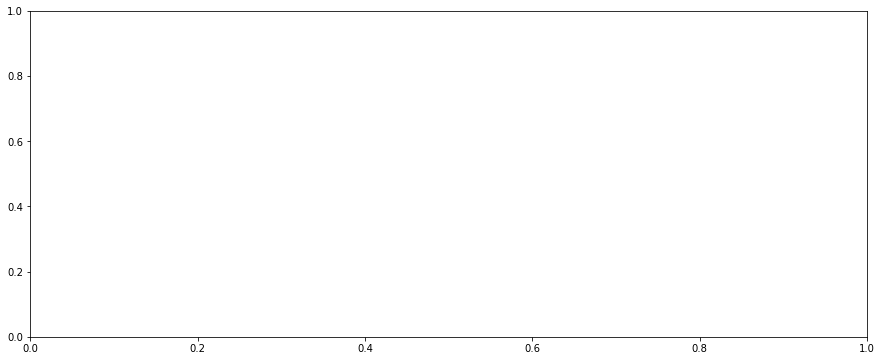

In [313]:
top_10 = df["Category"].value_counts().head(11).index

In [314]:
df["Category"] = df["Category"].apply(lambda x: x if x in top_10 else "Other")

In [309]:
top_2 = df["Account"].value_counts().head(1).index
df["Account"] = df["Account"].apply(lambda x: x if x in top_2 else "Salary Account")

In [310]:
df["Account"].value_counts()

Salary Account    2683
Name: Account, dtype: int64

In [317]:
cat_value_coutn = df["Category"].value_counts()

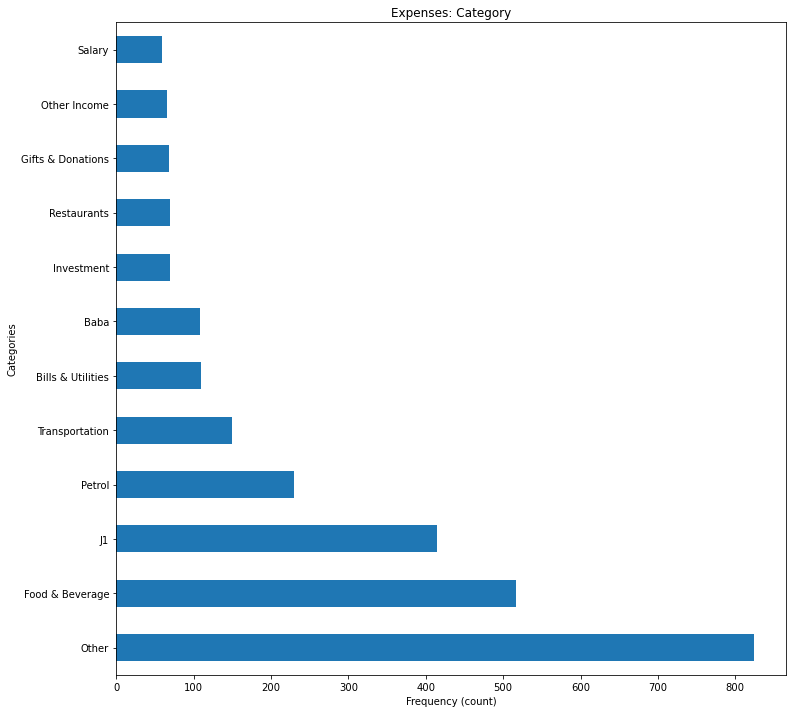

In [318]:
cat_value_coutn.plot(kind="barh", figsize=(12,12))
plt.xlabel("Frequency (count)")
plt.ylabel("Categories")
plt.title("Expenses: Category");

TypeError: no numeric data to plot

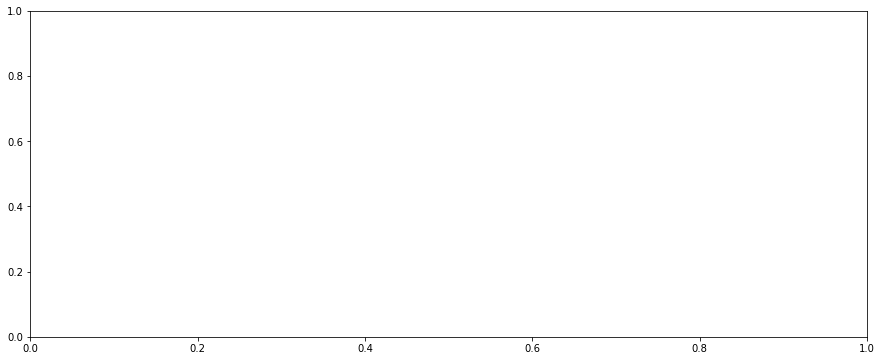

In [323]:
fig, ax = plt.subplots(figsize=(15, 6))
df["Category"].plot(ax=ax);

In [301]:
df_cat = df.groupby(['Category']).value_counts(normalize=True).rename("frequency").to_frame()
df_cat.head(50)

frequency
Category    Amount Account        Currency Date       Event           
Accessories -350   Salary Account INR      2021-07-30 No      0.166667
            -300   Cash           INR      2018-01-06 No      0.166667
            -50    Cash           INR      2017-10-24 No      0.166667
            -250   Salary Account INR      2020-09-11 No      0.166667
            -230   Cash           INR      2017-05-17 No      0.166667
            -150   Salary Account INR      2020-09-14 No      0.166667
Baba         2000  Cash           INR      2017-08-01 No      0.009259
                                           2017-10-13 No      0.009259
                                           2017-10-31 No      0.009259
                                           2018-03-23 No      0.009259
                                           2018-04-08 No      0.009259
                                           2018-04-27 No      0.009259
             3000  Cash           INR      2017-03-17 No      0.009259
             2000  Cash           INR      2017-09-16 No      0.009259
                                           2017-08-16 No      0.009259
            -5000  Salary Account INR      2020-07-30 No      0.009259
             2000  Cash           INR      2018-11-19 No      0.009259
            -5000  Salary Account INR      2022-06-01 No      0.009259
             2000  Cash           INR      2016-12-21 No      0.009259
             5000  Cash           INR      2018-12-06 No      0.009259
             6000  Cash           INR      2018-01-02 No      0.009259
                                           2018-06-23 No      0.009259
                                           2018-09-01 No      0.009259
             7000  Cash           INR      2017-02-11 No      0.009259
             8000  Cash           INR      2017-05-05 No      0.009259
             10000 Cash           INR      2018-07-01 No      0.009259
             3000  Cash           INR      2017-04-03 No      0.009259
             500   Cash           INR      2018-05-24 No      0.009259
                                           2017-11-16 No      0.009259
                                           2017-09-01 No      0.009259
                                           2017-02-13 No      0.009259
                                           2016-12-19 No      0.009259
                                           2016-11-26 No      0.009259
             400   Cash           INR      2017-03-09 No      0.009259
             300   Cash           INR      2017-11-15 No      0.009259
            -5000  Salary Account INR      2022-09-01 No      0.009259
                                           2022-08-01 No      0.009259
             500   Cash           INR      2018-11-08 No      0.009259
             700   Cash           INR      2017-02-26 No      0.009259
             1000  Cash           INR      2016-11-21 No      0.009259
                                           2017-12-30 No      0.009259
             1500  Cash           INR      2017-11-22 No      0.009259
                                           2017-08-28 No      0.009259
             2000  Cash           INR      2016-11-09 No      0.009259
             1500  Cash           INR      2017-02-14 No      0.009259
                                           2017-01-19 No      0.009259
                                           2017-01-13 No      0.009259
             1400  Cash           INR      2016-11-04 No      0.009259
             1000  Cash           INR      2018-01-20 No      0.009259
                                           2017-10-22 No      0.009259

In [299]:
# Create bar chart of `df_inccat`
sns.barplot(
    x="Category",
    y="frequency",
    data=df_cat
    #order=inccat_dict.values()
)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

ValueError: Could not interpret input 'Category'

In [233]:
df["Category"] = df["Category"].astype("category")

<AxesSubplot:>

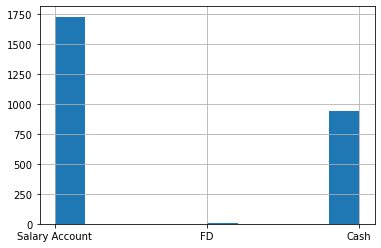

In [255]:
# df["Event"].value_counts(normalize=True).plot(
#     kind="bar",
#     xlabel="Backrupt",
#     ylabel="Frequency",
#     title="Amount",
#     figsize=(12, 12)
# );
df["Amount"].describe()
df["Account"].hist()

In [263]:
df_In = (df.query("Amount > 0") == 0) 
df_Out = (df.query("Amount < 0") == 1)

In [264]:
print(df_In.head())
print(df_Out.head())

       ID  Amount  Category  Account  Currency   Date  Event
14  False   False     False    False     False  False  False
18  False   False     False    False     False  False  False
32  False   False     False    False     False  False  False
35  False   False     False    False     False  False  False
36  False   False     False    False     False  False  False
      ID  Amount  Category  Account  Currency   Date  Event
0   True   False     False    False     False  False  False
1  False   False     False    False     False  False  False
2  False   False     False    False     False  False  False
3  False   False     False    False     False  False  False
4  False   False     False    False     False  False  False


In [213]:
df1 = pd.concat([df_In, df_Out], axis=1)
df1

,ID,Amount,Category,Account,Currency,Date,Event,ID,Amount,Category,Account,Currency,Date,Event
14,15.0,68000.0,Salary,Salary Account,INR,2022-08-30,No,NaN,NaN,NaN,NaN,NaN,NaT,NaN
18,19.0,1500.0,Gifts,Salary Account,INR,2022-08-27,No,NaN,NaN,NaN,NaN,NaN,NaT,NaN
32,33.0,660.0,Dividend,Salary Account,INR,2022-08-12,No,NaN,NaN,NaN,NaN,NaN,NaT,NaN
35,36.0,1000.0,Gifts,Salary Account,INR,2022-08-11,No,NaN,NaN,NaN,NaN,NaN,NaT,NaN
36,37.0,500.0,Gifts,Salary Account,INR,2022-08-11,No,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,NaN,NaN,NaN,NaN,NaN,NaT,NaN,2678.0,-100.0,J1,Cash,INR,2016-11-06,No
2678,NaN,NaN,NaN,NaN,NaN,NaT,NaN,2679.0,-100.0,J1,Cash,INR,2016-11-06,No
2679,NaN,NaN,NaN,NaN,NaN,NaT,NaN,2680.0,-100.0,Books,Cash,INR,2016-11-05,No
2680,NaN,NaN,NaN,NaN,NaN,NaT,NaN,2681.0,-100.0,J1,Cash,INR,2016-11-05,No


In [154]:
df.loc[df["Amount"] >= 0, "Flag"] = "Inflow"
df.loc[df["Amount"] <= 0, "Flag"] = "Outflow"

In [157]:
df_Inflow = df[df["Flag"]=="Inflow"] 
df_Outflow = df[df["Flag"]=="Outflow"] 

In [167]:
df_Outflow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2361 entries, 0 to 2681
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        2361 non-null   int64 
 1   Amount    2361 non-null   int64 
 2   Category  2361 non-null   object
 3   Account   2361 non-null   object
 4   Currency  2361 non-null   object
 5   Date      2361 non-null   object
 6   Event     2361 non-null   object
 7   Inflow    2361 non-null   object
 8   Outflow   2361 non-null   object
 9   Flag      2361 non-null   object
dtypes: int64(2), object(8)
memory usage: 202.9+ KB


In [199]:
df["Category"].value_counts().head()

Food & Beverage      516
J1                   415
Petrol               230
Transportation       149
Bills & Utilities    109
Name: Category, dtype: int64

In [200]:
df["Account"].value_counts().head()

Salary Account    1730
Cash               946
FD                   7
Name: Account, dtype: int64

In [159]:
df_Inflow["Amount"].describe()

count       322.000000
mean       8502.080745
std       16697.986462
min          60.000000
25%        1000.000000
50%        2200.000000
75%        6000.000000
max      121700.000000
Name: Amount, dtype: float64

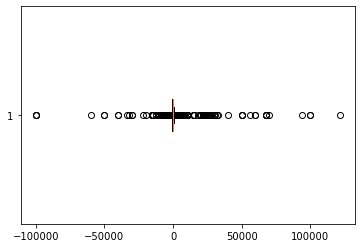

In [201]:
plt.boxplot(df["Amount"], vert=False);

In [205]:
mean_amount = df.groupby("Category")["Amount"].mean().sort_values(ascending=False)
mean_amount

Category
Salary           22439.932203
Withdrawal       16156.250000
Selling          10090.000000
Gifts             9405.000000
Debt              8228.571429
                     ...     
Flight           -5700.000000
Repayment        -7200.000000
Other Expense    -7596.904762
Investment       -8514.571429
SIP             -11111.111111
Name: Amount, Length: 62, dtype: float64

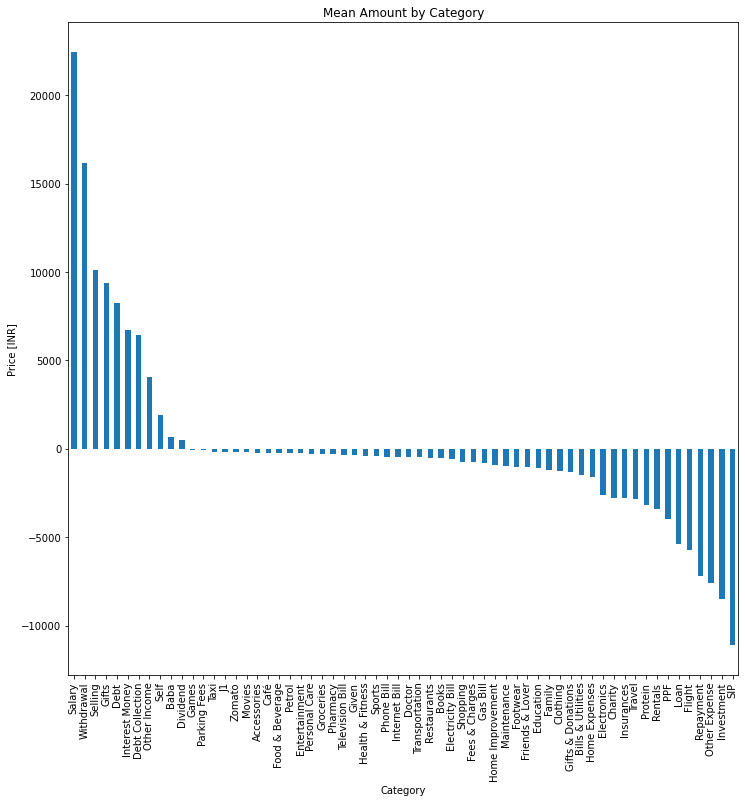

In [240]:
mean_amount.plot(
    kind="bar",
    xlabel="Category",
    ylabel="Price [INR]",
    title="Mean Amount by Category",
    figsize=(12, 12)
);

In [207]:
df["Amount"].unique()

array([  -5200,    -600,   -2300,     -70,    -210,    -200,   -3000,
         -5000,  -10000,  -40000,    -301,   -6090,   68000,    -500,
          -100,    -250,    1500,    -300,    -900,   -3200,    -240,
         -1150,   -7800,    -550,    -150,   -1000,     660,    -630,
         -2500,    1000,     500,    -350,     110,    -110,    -400,
          -800,   -5500,   -6300,    -330,    -700,    -260,   -2000,
          -870,   -1700,    -160,   -1600,   50000,  -50000,    -155,
         -1680,    -120,   -1965,     -10,    2000,    -320,    -360,
         -1300,     -50,    -450,    -205,   -1020,    -650,    -170,
        100000,    -975, -100000,  121700,    -455,   -1100,     975,
          1150,   30000,    -130,   -6000,  -30000,   70000,    -230,
         -1250,   -3100,   -4000,   -2200,    5000,    -425,    -675,
         -1800,  -32000,    -610,    -180,     800,   10000,   -7450,
         -2475,  -33500,   93900,     480,    -193,    -185,    -175,
          -224,     

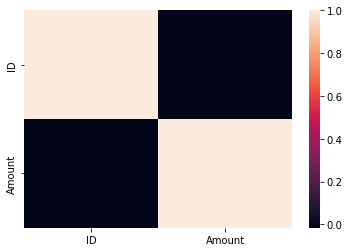

In [208]:
corr = df.select_dtypes("int64").corr()
sns.heatmap(corr);

In [241]:
sorted(df.columns)

['Account', 'Amount', 'Category', 'Currency', 'Date', 'Event', 'ID']

In [242]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        2683 non-null   int64         
 1   Amount    2683 non-null   int64         
 2   Category  2683 non-null   category      
 3   Account   2683 non-null   object        
 4   Currency  2683 non-null   object        
 5   Date      2683 non-null   datetime64[ns]
 6   Event     2683 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(2), object(3)
memory usage: 131.0+ KB


In [243]:
df.dtypes

ID                   int64
Amount               int64
Category          category
Account             object
Currency            object
Date        datetime64[ns]
Event               object
dtype: object

In [244]:
df.head(20)

,ID,Amount,Category,Account,Currency,Date,Event
0,1,-5200,Gifts & Donations,Salary Account,INR,2022-09-09,No
1,2,-600,Insurances,Salary Account,INR,2022-09-09,No
2,3,-2300,Clothing,Salary Account,INR,2022-09-09,No
3,4,-70,Food & Beverage,Salary Account,INR,2022-09-08,No
4,5,-210,Phone Bill,Salary Account,INR,2022-09-05,No
5,6,-200,Petrol,Salary Account,INR,2022-09-05,No
6,7,-200,Gifts & Donations,Salary Account,INR,2022-09-04,No
7,8,-3000,Phone Bill,Salary Account,INR,2022-09-02,No
8,9,-5000,PPF,Salary Account,INR,2022-09-02,No
9,10,-5000,Baba,Salary Account,INR,2022-09-01,No
